In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split,   GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Sampling the dataset for preliminary model selection**

In [3]:
data_path = '/content/drive/MyDrive/artifact/train_transformed.pkl'
data = pd.read_pickle(data_path)

# Fill NaN values in the entire DataFrame with the mode of the 'FraudResult' column
data = data.fillna(data['FraudResult'].mode()[0])

# Perform train-test split with stratification on 'FraudResult'
sample_data, _ = train_test_split(
    data,
    test_size=0.5,
    shuffle=True,
    stratify=data['FraudResult'],
    random_state=42
)

# Display the first few rows
sample_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,Year,Month,Day,Hour,Minute,Second
93591,17047.0,25954.0,1095.0,3052.0,3388.0,3.0,1.0,1.0,-40000.0,40000.0,...,0.0,0.0,0.0,0.0,2019.0,2.0,11.0,13.0,3.0,7.0
4846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13201,14916.0,37835.0,48.0,2773.0,288.0,5.0,5.0,2.0,1045.0,1045.0,...,0.0,0.0,0.0,0.0,2018.0,12.0,2.0,5.0,46.0,49.0
74848,52472.0,50953.0,2789.0,563.0,2912.0,5.0,0.0,2.0,500.0,500.0,...,0.0,0.0,0.0,0.0,2019.0,1.0,27.0,10.0,35.0,1.0


In [4]:
sample_data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'ProductCategory_0', 'ProductCategory_1', 'ProductCategory_2',
       'ProductCategory_3', 'ProductCategory_4', 'ProductCategory_5',
       'ProductCategory_6', 'ProductCategory_7', 'ProductCategory_8', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
sampled_data_numeric=sample_data.select_dtypes(include=['float64', 'int64'])

In [7]:
sampled_data_numeric.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'FraudResult', 'ProductCategory_0',
       'ProductCategory_1', 'ProductCategory_2', 'ProductCategory_3',
       'ProductCategory_4', 'ProductCategory_5', 'ProductCategory_6',
       'ProductCategory_7', 'ProductCategory_8', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'Second'],
      dtype='object')

In [8]:
param_grid = {
    'n_neighbors': [5, 7, 10, 15],            # Range of neighbors for varying sensitivity to local structure
    'weights': ['uniform', 'distance'],          # Uniform vs. distance-based weighting
    'p': [1, 2],                                 # Manhattan (p=1) and Euclidean (p=2) distances
}

grid= GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3,scoring='accuracy')

best_knn_model = grid.fit(sampled_data_numeric.drop('FraudResult', axis=1), sample_data['FraudResult'])

print(best_knn_model.best_estimator_)
print(best_knn_model.best_params_)
print(best_knn_model.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=1.000 total time=  13.5s
[CV 2/5] END n_neighbors=5, p=1, weights=uniform;, score=0.999 total time=  11.2s
[CV 3/5] END n_neighbors=5, p=1, weights=uniform;, score=1.000 total time=  11.3s
[CV 4/5] END n_neighbors=5, p=1, weights=uniform;, score=0.999 total time=  12.5s
[CV 5/5] END n_neighbors=5, p=1, weights=uniform;, score=1.000 total time=  12.2s
[CV 1/5] END n_neighbors=5, p=1, weights=distance;, score=1.000 total time=  11.7s
[CV 2/5] END n_neighbors=5, p=1, weights=distance;, score=0.999 total time=  11.1s
[CV 3/5] END n_neighbors=5, p=1, weights=distance;, score=0.999 total time=  10.5s
[CV 4/5] END n_neighbors=5, p=1, weights=distance;, score=0.999 total time=  11.6s
[CV 5/5] END n_neighbors=5, p=1, weights=distance;, score=1.000 total time=  11.7s
[CV 1/5] END n_neighbors=5, p=2, weights=uniform;, score=1.000 total time=   2.5s
[CV 2/5] END n_neighbors=5, p=2,

<Axes: xlabel='param_weights'>

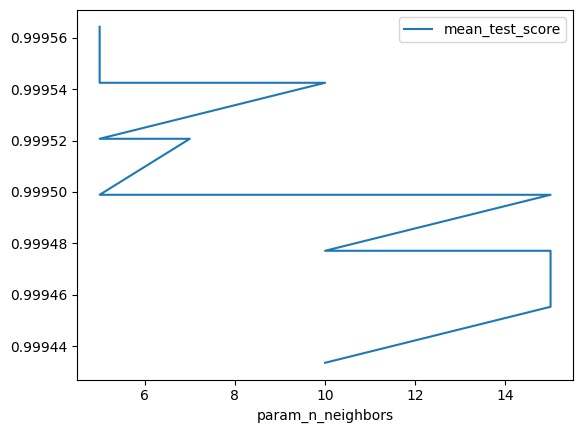

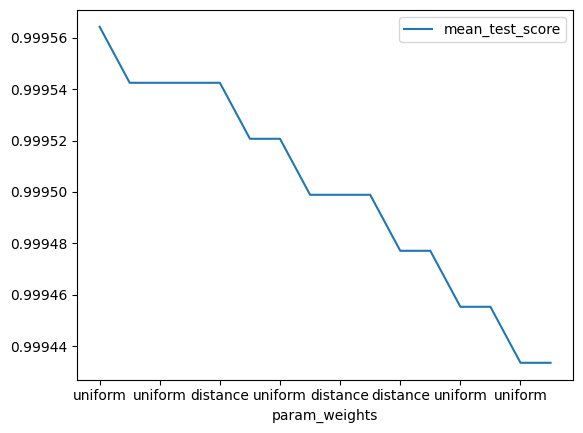

In [9]:
import pandas as pd

# Convert cv_results_ into a DataFrame for easier manipulation
cv_results = pd.DataFrame(best_knn_model.cv_results_)

# Group by 'mean_test_score' and sort in descending order
sorted_results = cv_results.sort_values(by='mean_test_score', ascending=False)

# Display the sorted results
sorted_results.plot(kind='line', x='param_n_neighbors', y='mean_test_score')
sorted_results.plot(kind='line', x='param_weights', y='mean_test_score')


In [10]:
param_grid_dt={
    'criterion':['gini', 'entropy'],
    'max_depth':[2, 3, 4],
    'min_samples_split':[1, 2, 3, 4],
    'max_features':['auto', 'sqrt', 'log2']
}
dt_model=GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit=True, verbose=3,scoring='accuracy')
best_dt_model=dt_model.fit(sampled_data_numeric.drop('FraudResult', axis=1), sample_data['FraudResult'])


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [11]:
print(best_dt_model.best_estimator_)
print(best_dt_model.best_params_)
print(best_dt_model.best_score_)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 2}
0.9993899782135077


# Model Selection Decision: Moving to Ensemble Models

Although initial models like k-NN, SVM, and Naive Bayes provided good accuracy, we decided to utilize more powerful ensemble models for the full dataset. Here’s why:

### Why Ensemble Models (XGBoost, LightGBM, etc.)?
1. **Improved Accuracy**:
   - Ensemble methods such as **XGBoost** and **LightGBM** combine multiple decision trees, reducing both bias and variance. This generally results in higher accuracy compared to individual models like k-NN or Naive Bayes.

2. **Better Handling of Imbalanced Data**:
   - Given the class imbalance in the dataset, ensemble methods can:
     - Use **class weights** to penalize misclassifications of minority classes.
     - Apply sampling techniques to address imbalance effectively.

3. **Feature Importance**:
   - Ensemble models provide insights into feature importance, helping us understand which features contribute the most to predictions. This is beneficial for communicating results to stakeholders.

4. **Efficiency on Larger Datasets**:
   - **XGBoost** and **LightGBM** are optimized for large datasets and can leverage GPU acceleration. This improves training and inference times, which is especially useful given the dataset size.

5. **Flexibility in Parameter Tuning**:
   - These models have extensive hyperparameter tuning options, allowing us to balance accuracy, speed, and model complexity. Using grid search or randomized search, we can optimize key parameters like `learning_rate`, `n_estimators`, and `max_depth` to achieve optimal performance.